# ScikitLearnの学習 ( 分類アルゴリズム )
機械学習・データマイニングを行うためのライブラリ。
かなり複雑な深層学習以外のMLはたいていScikitで実行できる
numpy・pandasと合わせて使うのが前提

## 前処理
Scikitではデータの前処理を行う事ができる
- 欠損値の対処
- 定性データをワンホットベクトルに変換
- 定量データの正規化・正則化

###　欠損値の除去・補完

In [9]:
import numpy as np
import pandas as pd

df = pd.DataFrame(
    {
    "A":[1,np.nan,3,4,5],
    "B":[6,7,8,np.nan,10],
    "C":[11,12,13,14,15]
    }
)

df

,A,B,C
0,1.0,6.0,11
1,NaN,7.0,12
2,3.0,8.0,13
3,4.0,NaN,14
4,5.0,10.0,15


In [10]:
# 欠損値かをbool値で返す
df.isnull()

,A,B,C
0,False,False,False
1,True,False,False
2,False,False,False
3,False,True,False
4,False,False,False


In [12]:
# 欠損値の保管 - 値を補完する、SimpleImputerのメソッドを用いる
# mean-平均、median-中央値、most_frequent-最頻値、constant-定数
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy="mean")
imp.fit(df)
imp.transform(df)

array([[ 1.  ,  6.  , 11.  ],
       [ 3.25,  7.  , 12.  ],
       [ 3.  ,  8.  , 13.  ],
       [ 4.  ,  7.75, 14.  ],
       [ 5.  , 10.  , 15.  ]])

In [13]:
from sklearn.impute import SimpleImputer
value = 0

imp = SimpleImputer(strategy="constant", fill_value=value)
imp.fit(df)
imp.transform(df)

array([[ 1.,  6., 11.],
       [ 0.,  7., 12.],
       [ 3.,  8., 13.],
       [ 4.,  0., 14.],
       [ 5., 10., 15.]])

### 定性データをワンホットベクトルに変換

In [15]:
df = pd.DataFrame(
    {
    "A":[1,2,3,4,5],
    "B":["a","b","c","a","b"]
    }
)

df

,A,B
0,1,a
1,2,b
2,3,c
3,4,a
4,5,b


In [20]:
# LabelEncoder - str型などの定性データを値ごとにワンホットベクトルに変換する
from sklearn.preprocessing import LabelEncoder

#エンコーディング
le = LabelEncoder()
le.fit(df.loc[:,"B"])

#変換後・元の値を確認
print(le.transform(df.loc[:,"B"]))
print(le.classes_ )

[0 1 2 0 1]
['a' 'b' 'c']


In [22]:
# LabelEncoder - str型などの定性データを値ごとにワンホットベクトルに変換する
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer

#データフレームを複製
df_ohe = df.copy()

#エンコーディング
le = LabelEncoder()
df_ohe.loc[:,"B"] = le.fit_transform(df_ohe.loc[:,"B"])

ohe = ColumnTransformer([("OneHotEncoder", OneHotEncoder(),[1])], remainder="passthrough")

df_ohe = ohe.fit_transform(df_ohe)
df_ohe

C:\Users\guest017\AppData\Local\Temp\ipykernel_13100\922263664.py:10: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_ohe.loc[:,"B"] = le.fit_transform(df_ohe.loc[:,"B"])


array([[1., 0., 0., 1.],
       [0., 1., 0., 2.],
       [0., 0., 1., 3.],
       [1., 0., 0., 4.],
       [0., 1., 0., 5.]])

### 定量データの正規化・正則化
- 分散正規化-平均が0，標準偏差を1にする
- 最小最大正規化 - 最小値が0、最大値を1にする

In [29]:
#分散正規化
import pandas as pd

df = pd.DataFrame(
    {
    "A":[1,2,3,4,5],
    "B":[100,200,400,500,800]
    }
)

df

,A,B
0,1,100
1,2,200
2,3,400
3,4,500
4,5,800


In [30]:
#StandardScaler - 分散正規化のインスタンス
from sklearn.preprocessing import StandardScaler

#インスタンスを作成→fit、transformで正規化を実行する
stdsc = StandardScaler()

stdsc.fit(df)
stdsc.transform(df)

array([[-1.41421356, -1.22474487],
       [-0.70710678, -0.81649658],
       [ 0.        ,  0.        ],
       [ 0.70710678,  0.40824829],
       [ 1.41421356,  1.63299316]])

In [31]:
#MinMaxScaler - 最大最小正規化のインスタンス
from sklearn.preprocessing import MinMaxScaler

#インスタンスを作成→fit、transformで正規化を実行する
mmsc = MinMaxScaler()

mmsc.fit(df)
mmsc.transform(df)

array([[0.        , 0.        ],
       [0.25      , 0.14285714],
       [0.5       , 0.42857143],
       [0.75      , 0.57142857],
       [1.        , 1.        ]])

## 分類アルゴリズム
データをクラスに分類する。大量のデータを分類するには、機械学習の中でも教師あり学習が活用される。
ユーザーを利用履歴などをもとに購入層ごと、またはサービスから退会する可能性を予測するのに用いる。

- サポートベクターマシン
- 決定木
- ランダムフォレスト法

分類用のモデルを作成するには、まずデータを学習用・テスト用に分割する。
機械学習の目的は学習用のデータだけに適応するだけでなく、テスト用のデータのような未知の値に対応する性能（汎化能力）を向上することである。
汎化能力を効率よく向上させる方法として、学習・テストデータの分割とモデル構築を複数回繰り返す交差検証が活用されている。

今回は有名なirisデータセットを使って分類を行う

## SVMを用いた分類

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [4]:
# pandasにirisを読み込む(今回は生のデータで読み込む場合から学習)
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target_names[iris.target]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
iris = load_iris()
X,y = iris.data, iris.target

#説明変数・目的変数の先頭5行を配置する
print("X:")
print(X[:5, :])
print("y:")
print(y[:5])

X:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
y:
[0 0 0 0 0]


In [7]:
print(len(X))

150


In [8]:
print(len(y))

150


In [ ]:
"""
SepalLength - がく（花びらの下のアレ）の長さ
SepalWidth - がくの幅
PetalLength - 花弁の長さ
PetalWidth - 花弁の幅

Species - 0-Setosa ,1-Versicolor ,2-Verginica
4つの値から、3つのどの品種化を確率的プログラミングと機械学習で分類する
"""

In [10]:
#train_test_split - 教師あり学習用のデータを学習用・テスト用に分割する
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=123)

#分割後のサイズ・形状を確認する
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [ ]:
"""
サポートベクターマシーン(SVM) - 教師あり学習の分類・回帰に使えるアルゴリズム。
SVMは直線・平面などで分類できない（＝線形分離できない）データを分類することができる。
高次元空間でのデータの内積＝距離を計算することで、データを高次元の空間上で線形分離するというタスクを要する

今回は説明変数が連続値で2つ・目的変数が0か1の場合を扱う
"""

AttributeError: 'Axes' object has no attribute 'set_xyabel'

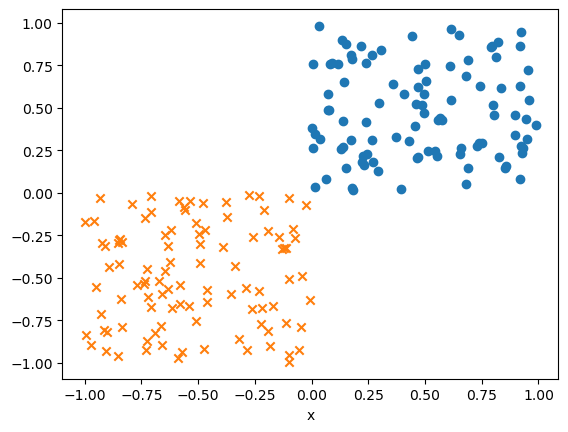

In [2]:
#SVM
import numpy as np
import matplotlib.pyplot as plt

#乱数シード
rng = np.random.default_rng(123)

#一様乱数とそのラベルを生成 - ラベルが0か1かで分類する
X0 = rng.uniform(size =(100, 2))
y0 = np.repeat(0, 100)

X1 = rng.uniform(-1, 0, size =(100, 2))
y1 = np.repeat(1, 100)

#乱数をプロット
fig, ax = plt.subplots()
ax.scatter(X0[:,0], X0[:,1], marker="o", label="Class-0")
ax.scatter(X1[:,0], X1[:,1], marker="x", label="Class-1")

ax.set_xlabel("x")
ax.set_xyabel("y")
ax.legend()
pltt.show()

array([1, 1, 1, 1, 1])

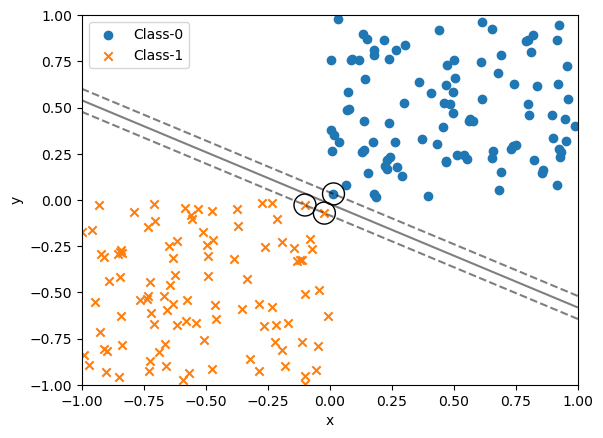

In [11]:
#SVMを使って生成した乱数の決定境界・マージン・サポートベクターを求める
from sklearn.svm import SVC

def plot_boundary_margin(X0, y0, X1, y1, kernel, C, xmin = -1, xmax = 1, ymin = -1, ymax = 1):
    #SVMのインスタンス
    #C - マージンの幅。広いほどサポートベクターの数が増える
    svc= SVC(kernel=kernel, C=C)
    
    #学習 - データをvstack・hstackで結合する
    svc.fit(np.vstack((X0,X1)), np.hstack((y0,y1)))
    
    #散布図
    fig, ax = plt.subplots()
    ax.scatter(X0[:,0], X0[:,1], marker="o", label="Class-0")
    ax.scatter(X1[:,0], X1[:,1], marker="x", label="Class-1")
    
    #決定境界とマージンをプロット
    xx,yy = np.meshgrid(np.linspace(xmin,xmax,100), np.linspace(ymin,ymax,100))
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    
    p = svc.decision_function(xy).reshape((100, 100))
    ax.contour(xx, yy, p, colors="k", levels=[-1,0,1], alpha=0.5, linestyles=["--","-","--"])
    
    #サポートベクター
    ax.scatter(svc.support_vectors_[:,0], svc.support_vectors_[:,1], s=250, facecolors="none", edgecolors="black")
    
    
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.legend(loc="best")
    plt.show()

plot_boundary_margin(X0, y0, X1, y1, kernel="linear", C=1e6)

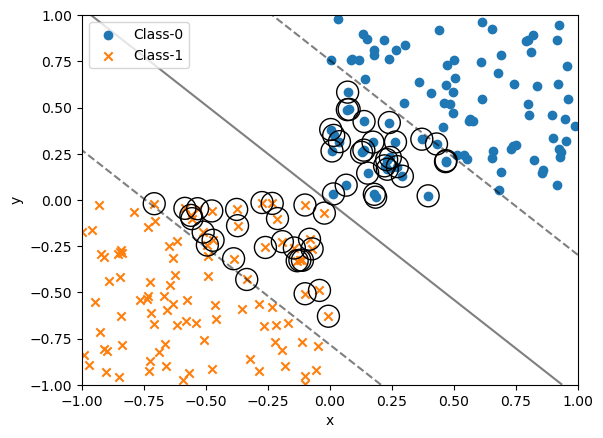

In [12]:
# マージンを広くする
plot_boundary_margin(X0, y0, X1, y1, kernel="linear", C=0.1)

In [ ]:
# 決定境界が非線形となる分布を分類する
# 高度な知性の本質とは、非線形的な「難しい」分類ができることである
# 非線形な決定境界を決めるにはSVM・ニューラルネットワークが最も適している。中身はブラックボックス化しやすい。

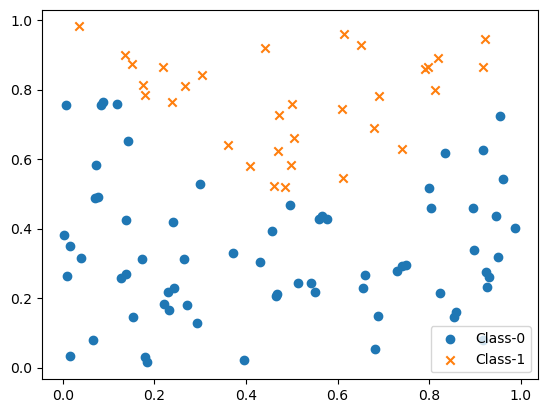

In [13]:
# y = 2(x-0.5)^2 + 0.5 が決定境界となる分布をSVMに分類させる
#乱数シード
rng = np.random.default_rng(123)

#一様乱数とそのラベルを生成 - ラベルが0か1かで分類する
#内包表記でラベルの値を多項目式で生成できる
X = rng.random(size=(100,2))
y = (X[:,1] > 2*(X[:,0] - 0.5)**2 + 0.5).astype(int)
fig, ax = plt.subplots()

#散布図
ax.scatter(X[y==0, 0], X[y==0, 1], marker="o", label="Class-0")
ax.scatter(X[y==1, 0], X[y==1, 1], marker="x", label="Class-1")

ax.legend()
plt.show()

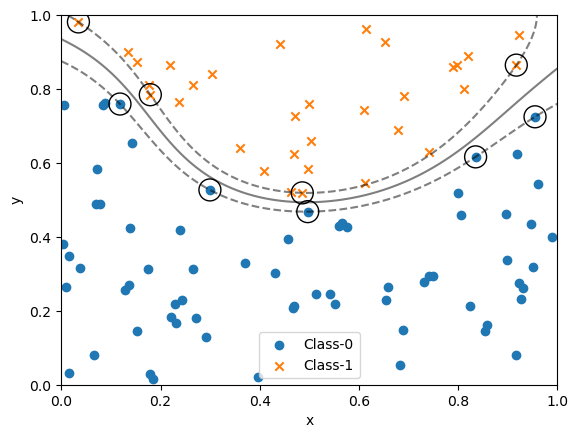

In [21]:
#内容表記を使った代入 - Y==0等の条件に合う場合、その値のみをリストに代入する
X0, X1 = X[y==0,:],X[y==1,:]
y0, y1 = y[y==0],y[y==1]

plot_boundary_margin(X0, y0, X1, y1, kernel="rbf", C=1e3, xmin=0, ymin=0)

## 決定木を使った分類

情報を木構造を使って分類し、機械学習の指標に情報利得（親ノードの不純度 - 子ノードの不純度の合計）を計算する。
情報利得・不順度の計算にはジニ係数・エントロピー・分類誤差等々が用いられる

ジニ不純度 - ノードに誤ったクラスが振り分けられてしまう確率

クラス0となる確率が0.6、クラス1となる確率が0.4、の場合 - ジニ不順度が0.48

ジニ不純度の計算(C - クラス数, P(c) -確率)
$$
    G = \sum_{c=0}^{C-1}P(c)^2 \quad
$$

情報利得が正となる場合、木の分割はジニ不純度を減らすので正しい分割となる。
逆に負となる場合は分割を減らしたほうがよい。
情報利得を増やすための決定木は、このように明示的なアルゴリズムで生成することができる。

In [24]:
#irisデータを3クラスに分類

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X,y = iris.data, iris.target

#学習データ・テストデータに分類
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.25,random_state=123)

#決定木のインスタンス
tree = DecisionTreeClassifier(max_depth=3, random_state=123)

#学習
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=123)

In [25]:
#pydotplusを用いて決定木を視覚化する
!pip install pydotplus

     -------------------------------------- 278.7/278.7 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24578 sha256=3be314637195e29ba0e40de743a393fc48fbba669864ba5e382adc12c0bcf13d
  Stored in directory: c:\users\guest017\appdata\local\pip\cache\wheels\5c\94\1f\953aa60af58ef512e5256e538ff0772c340229e5996ac51fd6
Successfully built pydotplus


In [27]:
#pydotplus・graghvizで可視化
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree, filled=True, rounded = True, class_names=["Setosa", "Versicolor", "Virginica"], feature_names=["Sepal Length","Sepal Width","Petal Length","Petal Width"], out_file=None)

#グラフを出力
graph = graph_from_dot_data(dot_data)
graph.write_png("Iris_tree.png")

InvocationException: GraphViz's executables not found

In [28]:
#決定木を使った予測
y_pred = tree.predict(X_test)
y_pred

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0])

In [ ]:
# ※グラフが出力できない → 要検証

In [ ]:
## ランダムフォレスト法による分類
データをランダムに分割して決定木の作成を繰り返し（ブートストラップ）、推定結果の多数決・平均値を求める（アンサンブル学習）
たいていの場合ランダムフォレスト法が一番分類の精度が高い。

In [30]:
#RandomForestClassifier - 決定木を100個制作してアンサンブル学習を施す

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, random_state=123)

#学習
forest.fit(X_train, y_train)

#予測
y_pred = forest.predict(X_test)
y_pred

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0])

In [ ]:
#メモ - 乱数の使い方
# https://tm23forest.com/contents/numpy-random-generator-is-better

#区間[0,1)の一様分布
x = rng.random() 

#区間[a, b)の一様分布
x = rng.uniform(-1, 1)

#標準正規分布(=rng.normal(0, 1))
x = rng.standard_normal()

#平均1,分散2^2の正規分布
x = rng.normal(1, 2) 

#0以上100未満の整数(等確率)
x = rng.integers(0, 100) 
